<a href="https://colab.research.google.com/github/sumasree10/OIBSIP/blob/main/Project_1_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset1

In [ ]:
!pip install --quiet pandas numpy matplotlib seaborn scikit-learn joblib statsmodels pmdarima kaggle


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.1 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv(next(iter(uploaded)))
print("Shape:", df.shape)
df.head()


Saving retail_sales_dataset.csv to retail_sales_dataset (1).csv
Shape: (1000, 9)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
import numpy as np

print("Columns:", df.columns.tolist())

date_cols = [c for c in df.columns if 'date' in c.lower()]
date_col = date_cols[0] if date_cols else None

if date_col:
    df['date'] = pd.to_datetime(df[date_col], errors='coerce')
else:
    df['date'] = pd.NaT

for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype(str).str.replace('[\$,]', '', regex=True)

for c in df.columns:
    if df[c].dtype != 'datetime64[ns]':  # Only convert non-datetime columns
        try:
            df[c] = pd.to_numeric(df[c])
        except ValueError:
            pass # Ignore columns that cannot be converted to numeric

df = df.ffill().bfill() # Use recommended fillna methods

if 'date' in df.columns:
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

print("Cleaned shape:", df.shape)
df.head()

Columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount', 'date', 'year', 'month', 'day']
Cleaned shape: (1000, 13)


<>:15: SyntaxWarning: invalid escape sequence '\$'
<>:15: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-808781877.py:15: SyntaxWarning: invalid escape sequence '\$'
  df[c] = df[c].astype(str).str.replace('[\$,]', '', regex=True)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,date,year,month,day
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023-11-24,2023,11,24
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023-02-27,2023,2,27
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023-01-13,2023,1,13
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023-05-21,2023,5,21
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023-05-06,2023,5,6


Sales column detected: Total Amount


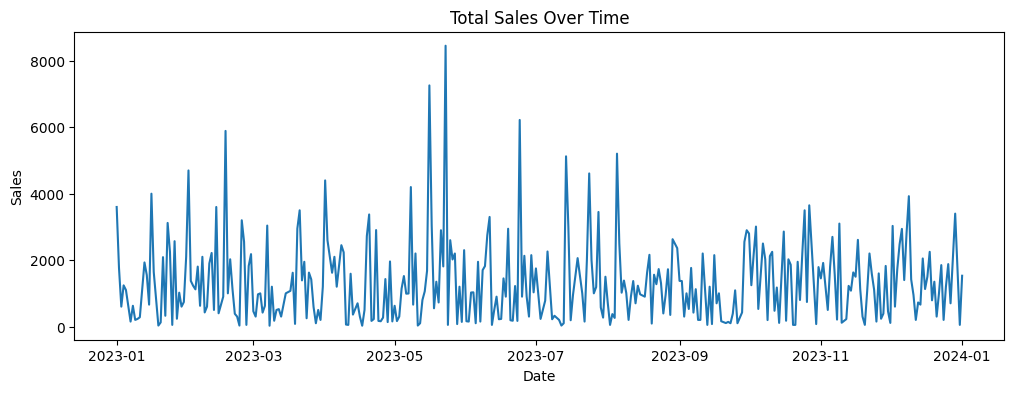

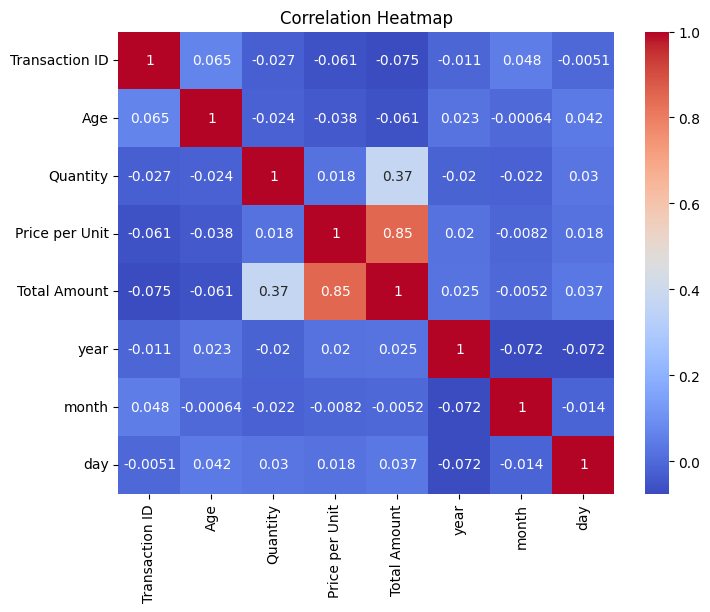

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_col = next((c for c in df.columns if 'sales' in c.lower() or 'amount' in c.lower() or 'total' in c.lower()), None)
print("Sales column detected:", sales_col)

# Plot sales over time
if sales_col and 'date' in df.columns:
    ts = df.groupby('date')[sales_col].sum()
    plt.figure(figsize=(12,4))
    plt.plot(ts)
    plt.title("Total Sales Over Time")
    plt.xlabel("Date"); plt.ylabel("Sales")
    plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

target = sales_col
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
num_cols = [c for c in num_cols if c != target]
cat_cols = [c for c in df.columns if df[c].dtype == 'object']

X = df[num_cols + cat_cols].copy()
y = df[target]

X[cat_cols] = X[cat_cols].fillna('missing')

pre = ColumnTransformer([
    ('num', 'passthrough', num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

model = Pipeline([
    ('pre', pre),
    ('rf', RandomForestRegressor(n_estimators=150, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R²:", r2_score(y_test, pred))

RMSE: 0.0
R²: 1.0


In [ ]:

!pip install --force-reinstall "numpy==1.26.4" "scipy==1.11.4" "pmdarima==2.0.4" --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 125.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8

In [ ]:
!pip install statsmodels --quiet


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  return


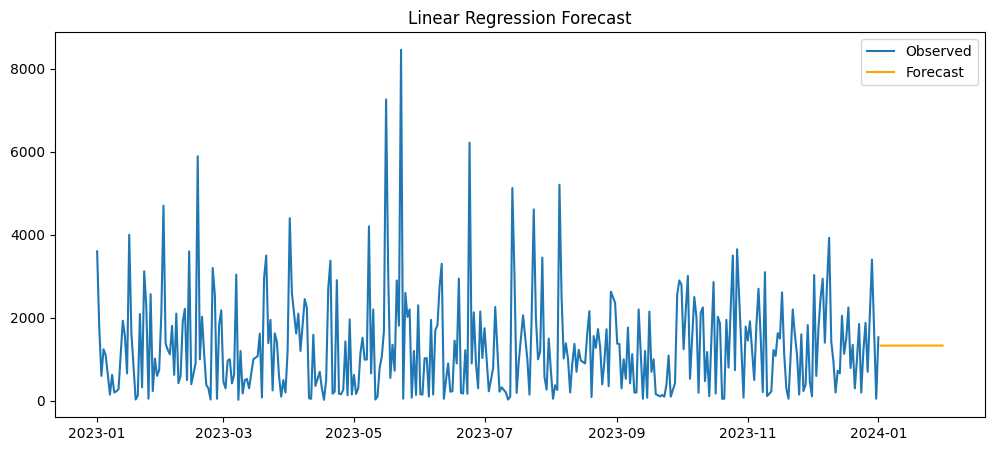

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np, matplotlib.pyplot as plt, pandas as pd

if 'date' in df.columns and sales_col:
    ts = df.groupby('date')[sales_col].sum().reset_index()
    ts['t'] = np.arange(len(ts))
    X, y = ts[['t']], ts[sales_col]
    model = LinearRegression().fit(X, y)
    future_t = np.arange(len(ts), len(ts)+30).reshape(-1,1)
    fc = model.predict(future_t)

    plt.figure(figsize=(12,5))
    plt.plot(ts['date'], y, label='Observed')
    future_dates = pd.date_range(ts['date'].iloc[-1]+pd.Timedelta(days=1), periods=30)
    plt.plot(future_dates, fc, label='Forecast', color='orange')
    plt.legend(); plt.title("Linear Regression Forecast")
    plt.show()


Dataset 2

In [ ]:

!pip install --quiet pmdarima scikit-learn matplotlib seaborn wordcloud



In [ ]:

from google.colab import files
import io
import pandas as pd
import os, sys

print("Please upload menu.csv using the file chooser (or mount Drive and set path).")
uploaded = files.upload()  # choose menu.csv

fn = None
for name in uploaded.keys():
    if name.lower().endswith('.csv'):
        fn = name
        break
if fn is None:
    raise FileNotFoundError("No CSV uploaded. Please upload menu.csv")

df = pd.read_csv(io.BytesIO(uploaded[fn]))
print(f"Loaded {fn} — shape {df.shape}")
df.head(5)


Please upload menu.csv using the file chooser (or mount Drive and set path).


Saving menu.csv to menu.csv
Loaded menu.csv — shape (260, 24)


,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
import numpy as np

def try_convert_numeric(col):
    return pd.to_numeric(df[col].astype(str).str.replace(',','').str.replace(r'[^0-9.\-]', '', regex=True), errors='coerce')

missing = df.isna().sum().sort_values(ascending=False)

cols_lower = [c.lower() for c in df.columns]
col_map = {}
for c in df.columns:
    lc = c.lower()
    if lc in ('price','cost','amount'):
        col_map[c] = 'price'
    if lc in ('date','day','order_date'):
        col_map[c] = 'date'
    if lc in ('sales','orders','quantity','qty'):
        col_map[c] = 'sales'
    if lc in ('item','item_name','name','dish'):
        col_map[c] = 'item'
    if lc in ('description','desc'):
        col_map[c] = 'description'
    if lc in ('category','cat'):
        col_map[c] = 'category'

if col_map:
    df = df.rename(columns=col_map)

for candidate in ['price','sales']:
    if candidate in df.columns:
        df[candidate] = try_convert_numeric(candidate)

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.dtypes


,0
category,object
item,object
Serving Size,object
Calories,int64
Calories from Fat,int64
Total Fat,float64
Total Fat (% Daily Value),int64
Saturated Fat,float64
Saturated Fat (% Daily Value),int64
Trans Fat,float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df.describe(include='all').T

if 'category' in df.columns:
    display(df['category'].value_counts().head(20))

if 'price' in df.columns:
    plt.figure(figsize=(8,4))
    df['price'].dropna().plot.hist(bins=40)
    plt.xlabel("price")
    plt.show()

if 'date' in df.columns and 'sales' in df.columns:
    ts = df.groupby('date')['sales'].sum().sort_index()
    plt.figure(figsize=(10,4))
    plt.plot(ts.index, ts.values, marker='o', linestyle='-')
    plt.ylabel("sales")
    plt.xlabel("date")
    plt.show()

text_cols = [c for c in df.columns if df[c].dtype == object][:4]
if text_cols:
    display(df[text_cols].head())


,count
category,
Coffee & Tea,95
Breakfast,42
Smoothies & Shakes,28
Chicken & Fish,27
Beverages,27
Beef & Pork,15
Snacks & Sides,13
Desserts,7
Salads,6


,category,item,Serving Size
0,Breakfast,Egg McMuffin,4.8 oz (136 g)
1,Breakfast,Egg White Delight,4.8 oz (135 g)
2,Breakfast,Sausage McMuffin,3.9 oz (111 g)
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g)
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g)


In [ ]:
if 'date' in df.columns and 'sales' in df.columns:
    from pmdarima import auto_arima
    import numpy as np
    ts = df.groupby('date')['sales'].sum().asfreq('D').fillna(0)
    train = ts[:-30]
    test = ts[-30:]
    arima = auto_arima(train, seasonal=True, m=7, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
    fc, conf_int = arima.predict(n_periods=30, return_conf_int=True)
    idx = pd.date_range(start=test.index[0], periods=30, freq='D')
    forecast = pd.Series(fc, index=idx)
    plt.figure(figsize=(12,5))
    plt.plot(train.index, train.values, label='train')
    plt.plot(test.index, test.values, label='test')
    plt.plot(forecast.index, forecast.values, label='forecast')
    plt.fill_between(forecast.index, conf_int[:,0], conf_int[:,1], alpha=0.2)
    plt.legend()
    plt.show()
    import joblib
    joblib.dump(arima, 'arima_model.joblib')
else:
    pass


In [ ]:
if 'price' in df.columns:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer
    from sklearn.pipeline import Pipeline
    from sklearn.metrics import mean_squared_error, r2_score

    data = df.copy()
    numeric_feats = [c for c in data.columns if pd.api.types.is_numeric_dtype(data[c]) and c!='price']
    cat_feats = [c for c in data.columns if data[c].dtype==object and c!='description' and c!='item']

    if 'description' in data.columns:
        data['desc_len'] = data['description'].astype(str).str.len()
        numeric_feats.append('desc_len')

    data = data[~data['price'].isna()].reset_index(drop=True)
    X = data[numeric_feats + cat_feats]
    y = data['price']

    preproc = ColumnTransformer([
        ('num', 'passthrough', numeric_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), cat_feats)
    ], remainder='drop')

    pipeline = Pipeline([
        ('pre', preproc),
        ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    pipeline.fit(X_train, y_train)
    preds = pipeline.predict(X_test)
    rmse = mean_squared_error(y_test, preds, squared=False)
    r2 = r2_score(y_test, preds)
    print(f"{rmse:.4f}", f"{r2:.4f}")
    import joblib
    joblib.dump(pipeline, 'price_model.joblib')
else:
    pass


In [ ]:
!pip install --quiet --force-reinstall numpy==1.26.4 pandas==2.2.2 scikit-learn==1.4.2
!pip install --quiet joblib
import numpy, pandas, sklearn
print("✅ All versions OK:", numpy.__version__, pandas.__version__, sklearn.__version__)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 51.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.4.2 which is incompatible.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.35.1 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 re

In [ ]:
!pip install --upgrade --no-deps scikit-learn==1.4.2 numpy==1.26.4 scipy==1.11.4 --quiet

In [ ]:
!pip install --upgrade scikit-learn --quiet

In [ ]:
!sudo apt-get install python3.10 python3.10-distutils -y
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.10


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'python3-distutils' instead of 'python3.10-distutils'
python3-distutils is already the newest version (3.10.8-1~22.04).
python3-distutils set to manually installed.
python3.10 is already the newest version (3.10.12-1~22.04.11).
python3.10 set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
  Using cached setuptools-80.9.0-py3-none-any.whl.metadata (6.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 15.3 MB/s  0:00:00
Using cached setuptools-80.9.0-py3-none-any.whl (1.2 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pip]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

text_field = None
for c in ['description','item','name','dish']:
    if c in df.columns:
        text_field = c
        break

if text_field is not None:
    texts = df[text_field].fillna('').astype(str).values
    vec = TfidfVectorizer(max_features=1000, stop_words='english')
    X_text = vec.fit_transform(texts)
    cosine_sim = cosine_similarity(X_text, X_text)
    most_similar = np.argmax(cosine_sim, axis=1)
    df['similar_to'] = df.iloc[most_similar][text_field].values

    def recommend(item_name, topn=5):
        matches = df[df[text_field].str.contains(item_name, case=False, na=False)]
        if matches.empty:
            return f"No item matches '{item_name}'"
        idx = matches.index[0]
        sim_scores = list(enumerate(cosine_sim[idx]))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        sim_scores = [s for s in sim_scores if s[0] != idx]
        top_idxs = [i for i,_ in sim_scores[:topn]]
        return df.iloc[top_idxs][[text_field, 'price', 'category']
                                 if 'price' in df.columns and 'category' in df.columns
                                 else [text_field]]

    sample_item = df[text_field].iloc[0][:60] if len(df)>0 else ''
    display(recommend(sample_item, topn=5))


,item
3,Sausage McMuffin with Egg
5,Steak & Egg McMuffin
4,Sausage McMuffin with Egg Whites
2,Sausage McMuffin
20,"Bacon, Egg & Cheese McGriddles with Egg Whites"


In [ ]:
df.to_csv('menu_cleaned.csv', index=False)
with open('report.txt','w', encoding='utf8') as f:
    f.write(f"Dataset shape: {df.shape}\n")
    f.write("Columns:\n")
    for c in df.columns:
        f.write(f" - {c}: {str(df[c].dtype)}\n")
    if 'price' in df.columns:
        f.write(f"\nPrice stats:\n{df['price'].describe().to_string()}\n")
    if 'date' in df.columns and 'sales' in df.columns:
        f.write("\nTime series: detected date+sales — auto_arima run.\n")
    f.write("\nSaved models: arima_model.joblib (if created), price_model.joblib (if created), text_kmeans.joblib, tfidf_vectorizer.joblib\n")
from google.colab import files
files.download('menu_cleaned.csv')
files.download('report.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>